In [1]:
%load_ext autoreload
%autoreload 2

# Fixing forward sampling

## Scenario 1 

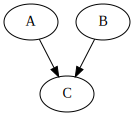

In [5]:
import hedgehog as hh
import pandas as pd

def scenario_1():

    X = pd.DataFrame(
        [
            [True, True, True],
            [False, False, False]
        ],
        columns=['A', 'B', 'C']
    )

    bn = hh.BayesNet(
        (['A', 'B'], 'C')
    )
    bn.fit(X)

    return bn

bn = scenario_1()
bn

In [6]:
bn.full_joint_dist()

A      B      C    
False  False  False    0.5
True   True   True     0.5
Name: P(A, B, C), dtype: float64

The problem with forward sampling is this case is that if we sample from A and then B independently, then we can end up by sampling pairs (A, B) that don't exist. This will raise an error when we condition P(C) on its parents.

In [4]:
next(bn._forward_sample())

KeyError: (True, False)

## Scenario 2

In [ ]:
import hedgehog as hh
import pandas as pd

def scenario_2():

    X = pd.DataFrame(
        [
            [1, 2, 3],
            [, False, False]
        ],
        columns=['A', 'B', 'C']
    )

    bn = hh.BayesNet(
        ('A', 'B'),
        ('B', 'C')
    )
    bn.fit(X)

    return bn

bn = scenario_2()
bn

One way to circumvent these issues would be to sample from the full joint distribution. But this is too costly.